In [1]:
using Plots;
using DelimitedFiles;
using Printf;

In [2]:
x = range(-4, stop = 4, length = 9);
y = range(-4, stop = 4, length = 9);
InnerBound = 2;

Nodes = Array{Any,2}(undef,0,2);

count = 0;
for i = 1:length(y)
    for j = 1:length(x)
        count += 1;
        Nodes = [Nodes; [count tuple([x[j], y[i]]...)]];
    end
end
Nodes

81×2 Array{Any,2}:
  1  (-4.0, -4.0)
  2  (-3.0, -4.0)
  3  (-2.0, -4.0)
  4  (-1.0, -4.0)
  5  (0.0, -4.0) 
  6  (1.0, -4.0) 
  7  (2.0, -4.0) 
  8  (3.0, -4.0) 
  9  (4.0, -4.0) 
 10  (-4.0, -3.0)
 11  (-3.0, -3.0)
 12  (-2.0, -3.0)
 13  (-1.0, -3.0)
  ⋮              
 70  (2.0, 3.0)  
 71  (3.0, 3.0)  
 72  (4.0, 3.0)  
 73  (-4.0, 4.0) 
 74  (-3.0, 4.0) 
 75  (-2.0, 4.0) 
 76  (-1.0, 4.0) 
 77  (0.0, 4.0)  
 78  (1.0, 4.0)  
 79  (2.0, 4.0)  
 80  (3.0, 4.0)  
 81  (4.0, 4.0)  

In [3]:
Quads = Array{Any,2}(undef,0,4);

#count = 0;
for i = 1:length(y)-1
    for j = 1:length(x)-1
        if (((abs(x[j]) < InnerBound)||(abs(x[j+1]) < InnerBound))&&((abs(y[i]) < InnerBound)||(abs(y[i+1]) < InnerBound)))
        else
            #count += 1;
            I = (i-1)*length(y) + j;
            J = (i-1)*length(y) + j+1;
            K = i*length(y) + j + 1;
            L = i*length(y) + j;
            Quads = [Quads; [I J K L]];
        end
    end
end

Quads

48×4 Array{Any,2}:
  1   2  11  10
  2   3  12  11
  3   4  13  12
  4   5  14  13
  5   6  15  14
  6   7  16  15
  7   8  17  16
  8   9  18  17
 10  11  20  19
 11  12  21  20
 12  13  22  21
 13  14  23  22
 14  15  24  23
  ⋮            
 59  60  69  68
 60  61  70  69
 61  62  71  70
 62  63  72  71
 64  65  74  73
 65  66  75  74
 66  67  76  75
 67  68  77  76
 68  69  78  77
 69  70  79  78
 70  71  80  79
 71  72  81  80

In [4]:
TriElements = Array{Any,2}(undef,0,3);

count = 0;
for i = 1:length(y)-1
    for j = 1:length(x)-1
        if (((abs(x[j]) < InnerBound)||(abs(x[j+1]) < InnerBound))&&((abs(y[i]) < InnerBound)||(abs(y[i+1]) < InnerBound)))
            I = (i-1)*length(y) + j;
            J = (i-1)*length(y) + j+1;
            K = i*length(y) + j + 1;
            L = i*length(y) + j;
            TriElements = [TriElements; [I J L]; [J K L]];
        end
    end
end
TriElements

32×3 Array{Any,2}:
 21  22  30
 22  31  30
 22  23  31
 23  32  31
 23  24  32
 24  33  32
 24  25  33
 25  34  33
 30  31  39
 31  40  39
 31  32  40
 32  41  40
 32  33  41
  ⋮        
 41  42  50
 42  51  50
 42  43  51
 43  52  51
 48  49  57
 49  58  57
 49  50  58
 50  59  58
 50  51  59
 51  60  59
 51  52  60
 52  61  60

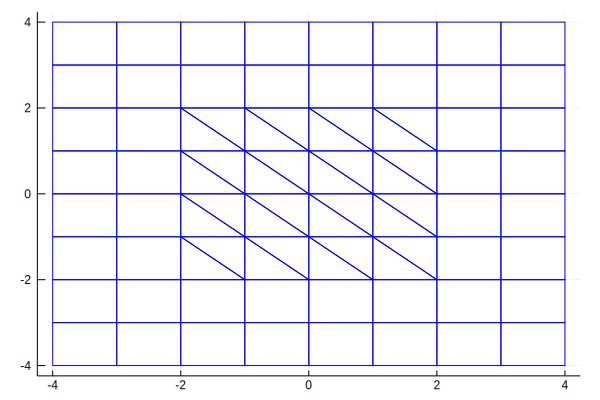

In [5]:
plt = plot(0,0,legend=:none);
for N = 1:size(Quads)[1]
    rect = Array{Float64,2}(undef,5,2);
    for i = 1:5
        n = (i-1)%4 + 1;
        Nd = Quads[N,n];
        for j = 1:2
           rect[i,j] = Nodes[Nd,2][j];
        end
    end
    plot!(plt,rect[:,1],rect[:,2],legend=:none,line=:blue);
end
for N = 1:size(TriElements)[1]
    tri = Array{Float64,2}(undef,4,2);
    for i = 1:4
        n = (i-1)%3 + 1;
        Nd = TriElements[N,n];
        for j = 1:2
           tri[i,j] = Nodes[Nd,2][j];
        end
    end
    plot!(plt,tri[:,1],tri[:,2],legend=:none,line=:blue);
end
plot(plt)

In [12]:
NUMNP = size(Nodes)[1]
NUMEG = 2;
NLCASE = 1;
MODEX = 1;  #Mode of execution, currently does nothing in the OFE code
Force = 1e4;
len = length(x)-1;
lstart = x[1];
hend = y[end];
step = 1;
dF = Force/(len/step);
topstart = findall(Nd->(Nd == (lstart, hend)), Nodes[:,2])[1] - 1;
Ld = zeros(Int(len/step + 1),3);
for i = 1:Int(len/step)+1
    if ((i == 1)||(i == Int(len/step) + 1))
        Ld[i,:] = [topstart+i, 2, dF/2];
    else
        Ld[i,:] = [topstart+i, 2, dF];
    end
end
YM = 2e6;
thickness = 0.1;
PR = 0.33;

endl = ",";

open("GeneratedPatchTest.txt", "w") do f
    writedlm(f, NUMNP, endl);
    writedlm(f, endl);
    writedlm(f, NUMEG, endl);
    writedlm(f, endl);
    writedlm(f, NLCASE, endl);
    writedlm(f, endl);
    writedlm(f, MODEX, endl);
    writedlm(f, endl);
    for i = 1:NUMNP
        if (i == 1)
            writedlm(f, i);
            writedlm(f, endl);
            writedlm(f, "1,1,1,");
            writedlm(f, Nodes[i,2][1]);
            writedlm(f, endl);
            writedlm(f, Nodes[i,2][2]);
            writedlm(f, ",0,0,");
        elseif (i == length(x))
            writedlm(f, i);
            writedlm(f, endl);
            writedlm(f, "0,1,1,");
            writedlm(f, Nodes[i,2][1]);
            writedlm(f, endl);
            writedlm(f, Nodes[i,2][2]);
            writedlm(f, ",0,0,");
        else
            writedlm(f, i);
            writedlm(f, endl);
            writedlm(f, "0,0,1,");
            writedlm(f, Nodes[i,2][1]);
            writedlm(f, endl);
            writedlm(f, Nodes[i,2][2]);
            writedlm(f, ",0,0,");
        end
    end
    
    writedlm(f, "1,"); #Load Case 1
    writedlm(f, size(Ld)[1]); #NLoads
    writedlm(f, endl);
    for i = 1:size(Ld)[1]
        writedlm(f, Ld[i,1]);
        writedlm(f, endl);
        writedlm(f, Ld[i,2]);
        writedlm(f, endl);
        writedlm(f, Ld[i,3]);
        writedlm(f, endl);
    end
    
    writedlm(f, "1,"); #Element Group Number
    writedlm(f, "1,"); #NUMMAT
    writedlm(f, size(Quads)[1]); #NUME
    writedlm(f, endl);
    
    writedlm(f, "1,"); #Material Number
    writedlm(f, YM);
    writedlm(f, endl);
    writedlm(f, thickness);
    writedlm(f, endl);
    writedlm(f, PR);
    writedlm(f, endl);
    
    for i = 1:size(Quads)[1]
        writedlm(f, i);
        writedlm(f, endl);
        for j = 1:4
            writedlm(f, Quads[i,j]);
            writedlm(f, endl);
        end
        writedlm(f, "1,");
        writedlm(f, "2,");
        writedlm(f, "2,");
    end
    
    writedlm(f, "2,"); #Element Group Number
    writedlm(f, "1,"); #NUMMAT
    writedlm(f, size(TriElements)[1]); #NUME
    writedlm(f, endl);
    
    writedlm(f, "1,"); #Material Number
    writedlm(f, YM);
    writedlm(f, endl);
    writedlm(f, thickness);
    writedlm(f, endl);
    writedlm(f, PR);
    writedlm(f, endl);
    
    for i = 1:size(TriElements)[1]
        writedlm(f, i);
        writedlm(f, endl);
        for j = 1:3
            writedlm(f, TriElements[i,j]);
            writedlm(f, endl);
        end
        writedlm(f, "1,");
        writedlm(f, "2,");
        writedlm(f, "2,");
    end
end